<a href="https://colab.research.google.com/github/Afreed007/HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
!git clone https://github.com/Afreed007/HR-Analytics.git

fatal: destination path 'HR-Analytics' already exists and is not an empty directory.


In [67]:
data  = pd.read_csv("HR-Analytics/aug_train.csv")
test = pd.read_csv("HR-Analytics/aug_test.csv")

In [69]:
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [70]:
data.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object


In [71]:
data.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [72]:
data.corr(numeric_only=True)

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


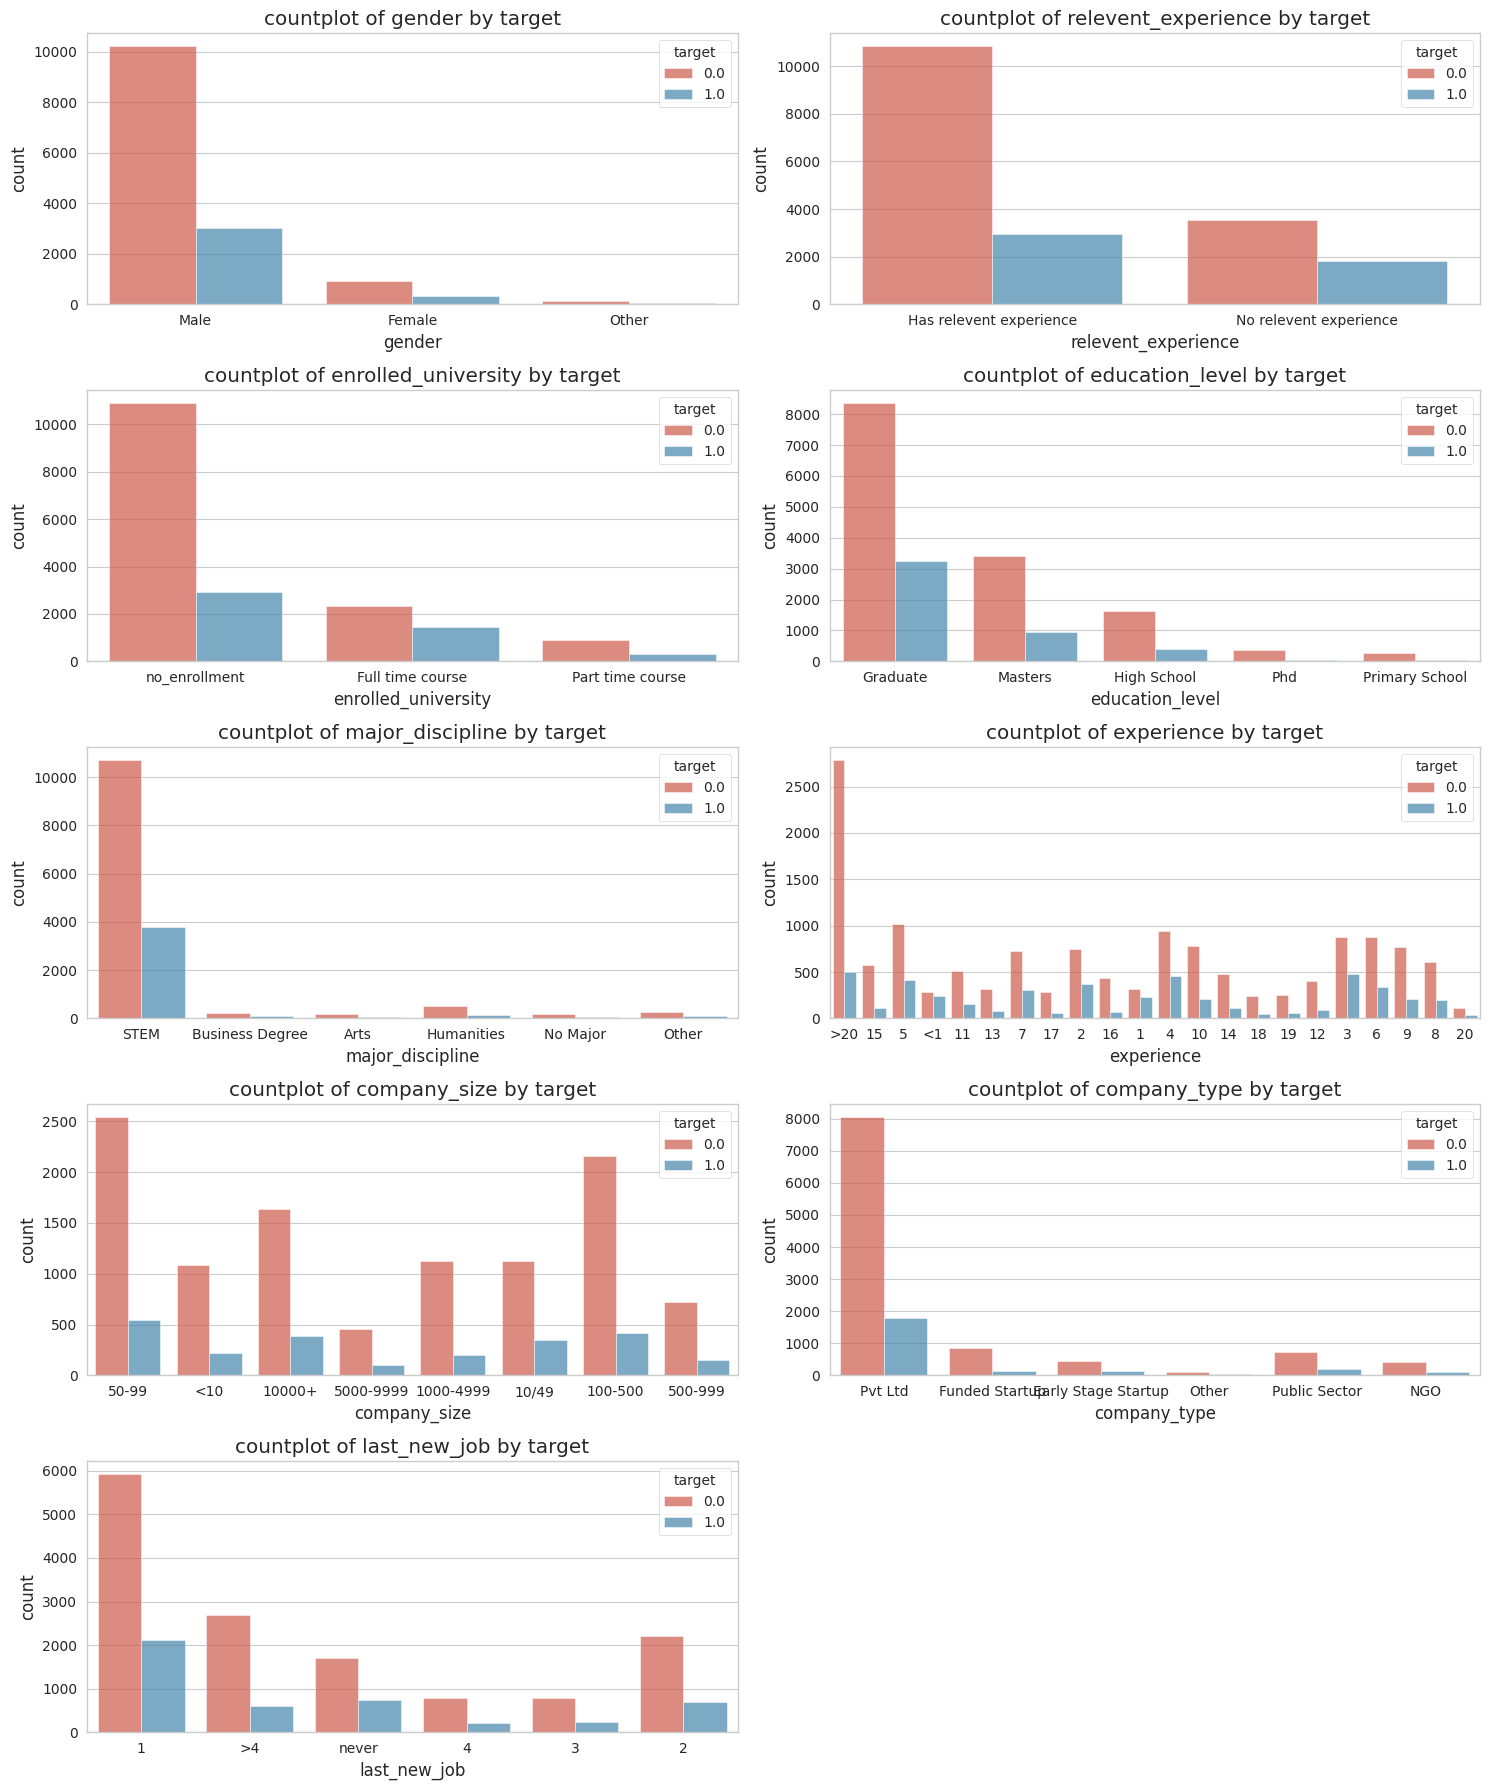

In [73]:
#frequency of each category separated by label
plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
n = 1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f,hue='target', alpha = 0.7,data=data)
    plt.title(f"countplot of {f} by target")
    n = n+1
plt.tight_layout()
plt.show()

# 1. Data Treatment

In [74]:
#churn vs normal
counts = data.target.value_counts()
not_changed = counts[0]
changed = counts[1]
perc_not_changed = (not_changed/(not_changed+changed))*100
perc_changed = (changed/(not_changed+changed))*100
print(f"there were {not_changed} not_changed ({perc_not_changed:.3f}%) and {changed} changed ({perc_changed:.3f}%).")


there were 14381 not_changed (75.065%) and 4777 changed (24.935%).


In [75]:
np.array(data.columns[data.dtypes!=object])

array(['enrollee_id', 'city_development_index', 'training_hours',
       'target'], dtype=object)

In [76]:
import copy
df_train = copy.deepcopy(data)
df_test = copy.deepcopy(test)

cols = np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i] = df_train[i].map(str)
        df_test[i] = df_test[i].map(str)
df_test.drop(columns=np.delete(cols, len(cols)-1), inplace=True)
df_train.drop(columns=cols, inplace=True)

In [77]:
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')




# sklearn preprocessing





In [78]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build the dict function
cols = np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)] = test[np.delete(cols,len(cols)-1)]

In [79]:
df_train.dtypes

,0
city,int64
gender,int64
relevent_experience,int64
enrolled_university,int64
education_level,int64
major_discipline,int64
experience,int64
company_size,int64
company_type,int64
last_new_job,int64


In [80]:
df_train.head(5)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,enrollee_id,city_development_index,training_hours,target
0,5,1,0,3,0,5,21,8,6,0,8949,0.920,36,1.0
1,77,1,1,3,0,5,6,4,5,4,29725,0.776,47,0.0
2,64,3,1,0,0,5,15,8,6,6,11561,0.624,83,0.0
3,14,3,1,2,0,1,20,8,5,6,33241,0.789,52,1.0
4,50,1,0,3,2,5,21,4,1,3,666,0.767,8,0.0


In [81]:
df_test.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours'],
      dtype='object')

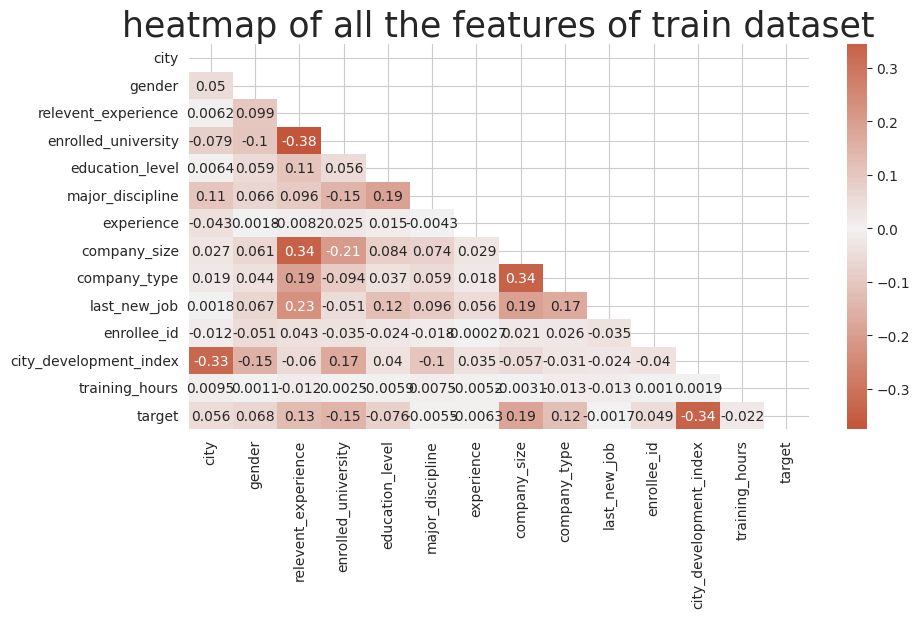

In [82]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize=(10,5))


# generate the upper mask
mask = np.zeros_like(df_train.corr(),dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df_train.corr(),cmap = sns.diverging_palette(20,20,n=200),annot = True ,mask = mask , center=0);
plt.title("heatmap of all the features of train dataset",fontsize = 25);

In [83]:
df_train.columns[0:9]

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type'],
      dtype='object')

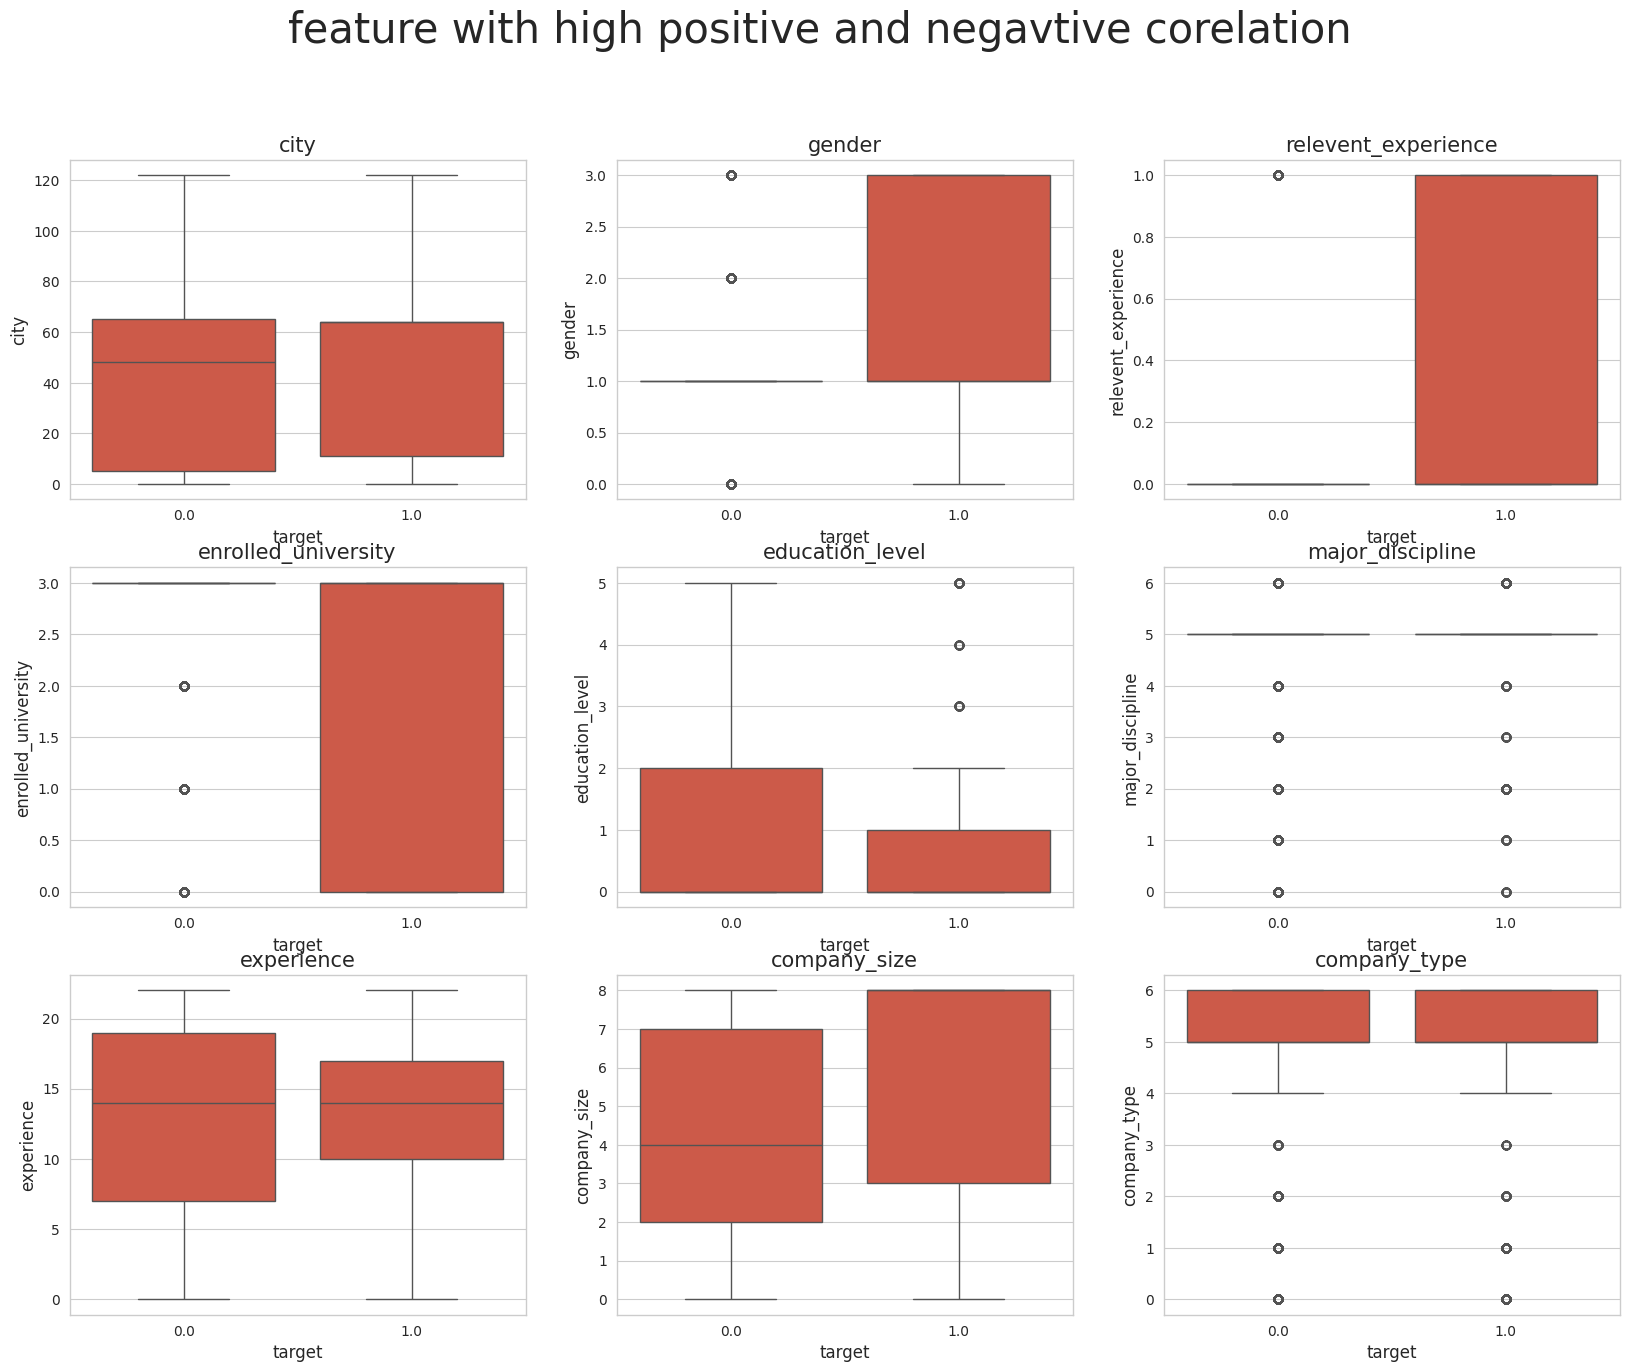

In [84]:
# visualizing the feature which is positive and negative corelation

f, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20,15))

f.suptitle('feature with high positive and negavtive corelation',size = 30)

axes = axes.flatten()

for i, col in enumerate(df_train.columns[0:9]):
    sns.boxplot(x='target', y=col, data=df_train, ax=axes[i])
    axes[i].set_title(col, fontsize=15)


plt.show()

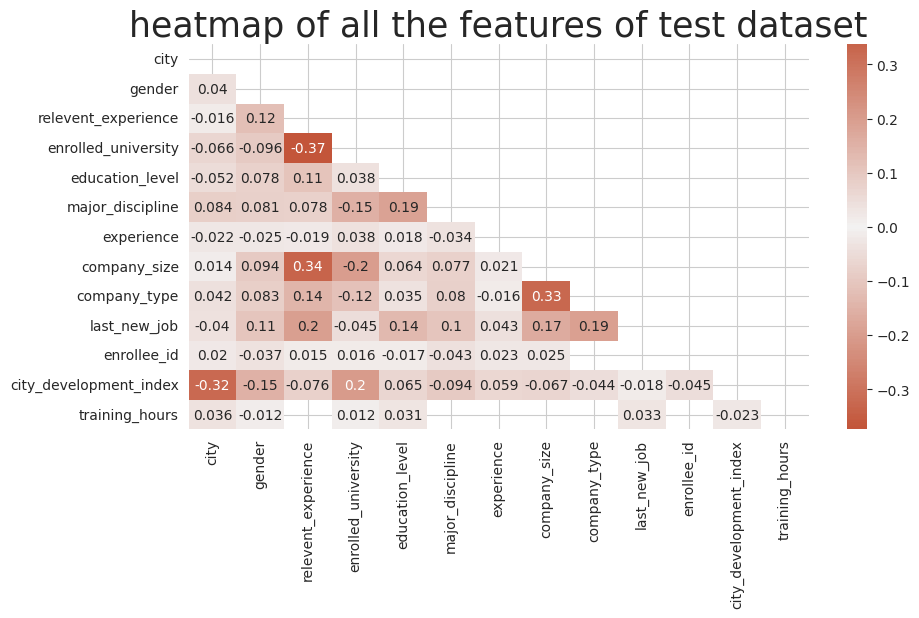

In [85]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize=(10,5))


# generate the upper mask for test data
mask = np.zeros_like(df_test.corr(),dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True


sns.heatmap(df_test.corr()[(df_test.corr().abs()>0.01)],cmap = sns.diverging_palette(20,20,n=200),annot = True ,mask = mask , center=0);
plt.title("heatmap of all the features of test dataset",fontsize = 25);

In [86]:
df_train['target'].value_counts()

,count
target,
0.0,14381
1.0,4777


In [87]:
#2. deal with imbalance data using SMOTE

In [88]:
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours', 'target'],
      dtype='object')

In [89]:
ftrain = ['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'company_size',
       'company_type', 'city_development_index',
       'training_hours', 'target']
ftest = ['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'company_size',
       'company_type', 'city_development_index',
       'training_hours']

def Definedata():
    data2 =df_train[ftrain]
    x = data2.drop(columns=['target']).values
    y = data2['target'].values
    return x,y

In [90]:
def SMOTE():
    #borderline-SMOTE for imbalance Dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where

    x,y =Definedata()
    #summarize the class dist
    counter = Counter(y)
    print(counter)
    #transform the data
    smt = SMOTE(random_state= 0)
    x , y =smt.fit_resample(x,y)

    x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=2)
    #summarize the new class dist
    counter = Counter(y)
    print(counter)
    #scatter plot of eamples by class labels
    for label , _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(x[row_ix,0],x[row_ix,1],label = str(label))
    pyplot.legend()
    pyplot.show()
    return x_train , x_test , y_train , y_test

# 3.Machine learning modeling

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [92]:
def Models(models ,x_train ,x_test , y_train ,y_test , title):
    model = models
    model.fit(x_train ,y_train)

    x,y = Definedata()
    train_matrix = pd.crosstab(y_train ,model.predict(x_train), rownames = ['Actual'],colnames = ['predicted'])
    test_matrix = pd.crosstab(y_test , model.predict(x_test),rownames=['Actual'],colnames=['predicted'])
    matrix = pd.crosstab(y , model.predict(x) , rownames=['Actual'] , colnames=['predicted'])

    f,(ax1 , ax2 ,ax3) = plt.subplots(1,3,sharey = True , figsize = (20,3))
    g1 = sns.heatmap(train_matrix , annot = True ,fmt = '.1f',cbar = False , annot_kws = {'size' : 18},ax= ax1)
    g1.set_title(title)
    g1.set_ylabel('total carrer switch = {}'.format(y_train.sum()),fontsize = 14 ,rotation = 90)
    g1.set_xlabel('Accuracy score trainset = {}'.format(accuracy_score(model.predict(x_train),y_train)))

    g2 = sns.heatmap(test_matrix , annot = True ,fmt = '.1f',cbar = False , annot_kws = {'size' : 18},ax= ax2)
    g2.set_ylabel('total carrer switch = {}'.format(y_test.sum()),fontsize = 14 ,rotation = 90)
    g2.set_xlabel('Accuracy score testset = {}'.format(accuracy_score(model.predict(x_test),y_test)))

    g3 = sns.heatmap(matrix , annot = True ,fmt = '.1f',cbar = False , annot_kws = {'size' : 18},ax= ax3)
    g3.set_ylabel('total carrer switch = {}'.format(y.sum()),fontsize = 14 ,rotation = 90)
    g3.set_xlabel('Accuracy score totalset = {}'.format(accuracy_score(model.predict(x),y)))

    plt.show()
    return y , model.predict(x)

In [93]:
def Featureimportance(models):
    model = models
    model.fit(x_train1,y_train1)
    importance = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'features': ftest, 'Importance':importance})
    imp['sum importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = "Importance")
    return imp

Counter({np.float64(0.0): 14381, np.float64(1.0): 4777})
Counter({np.float64(1.0): 14381, np.float64(0.0): 14381})


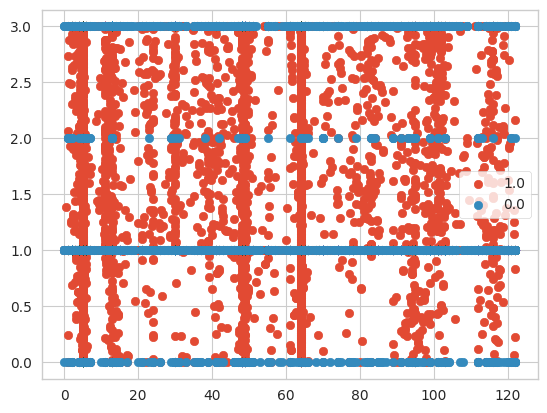

In [94]:
x_train1 ,x_test1 , y_train1 ,y_test1 = SMOTE()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


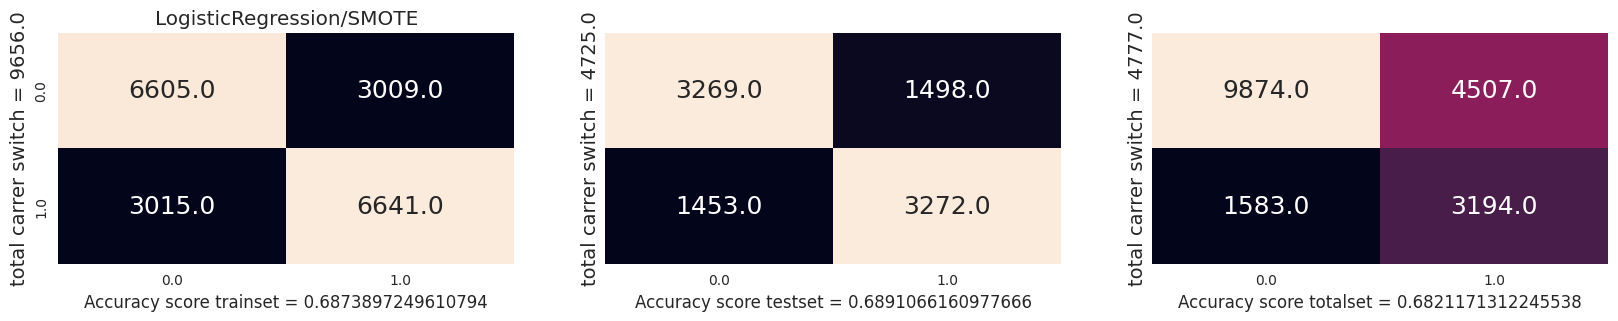

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 1.]))

In [95]:
#'LogisticRegression/SMOTE'
title ='LogisticRegression/SMOTE'
Models(LogisticRegression(),x_train1,x_test1,y_train1,y_test1,title)

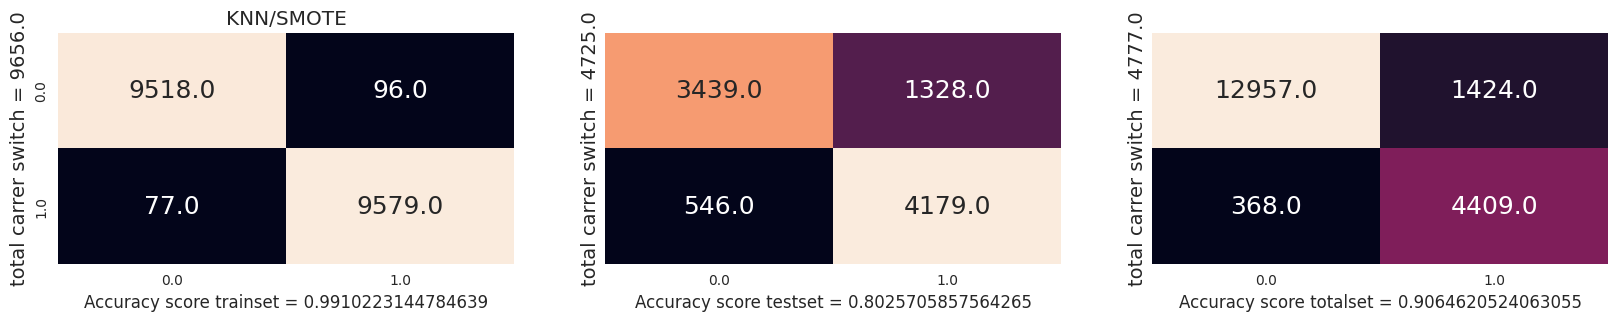

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]))

In [96]:
#KNearestNeighbour/SMOTE'
title ='KNN/SMOTE'
Models(KNeighborsClassifier(n_neighbors=1),x_train1,x_test1,y_train1,y_test1,title)

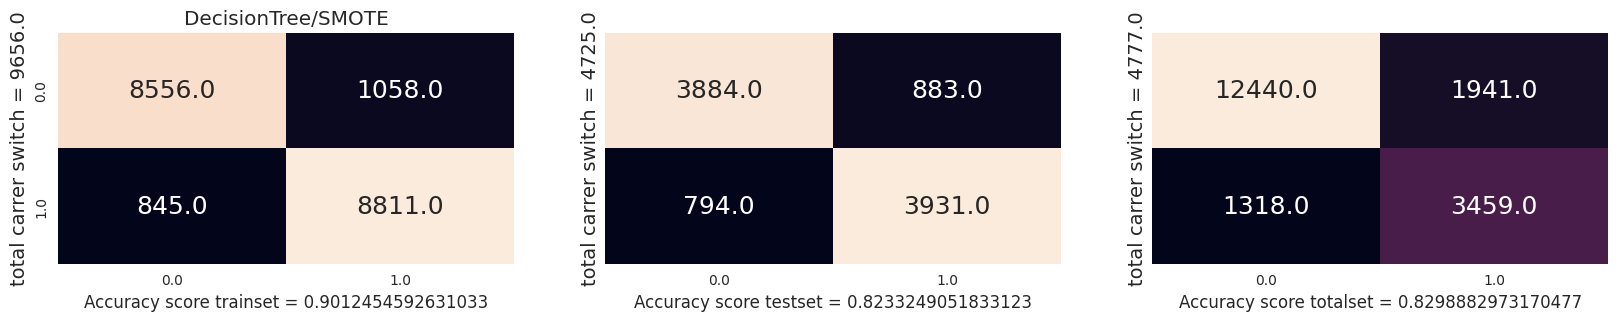

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [97]:
#decisiontree/SMOTE'
title ='DecisionTree/SMOTE'
Models(DecisionTreeClassifier(max_depth=14),x_train1,x_test1,y_train1,y_test1,title)

In [98]:
Featureimportance(DecisionTreeClassifier(max_depth=14))

,features,Importance,sum importance
3,enrolled_university,0.021618,0.193324
1,gender,0.029720,0.070754
0,city,0.041034,0.041034
5,company_size,0.072238,0.406342
2,relevent_experience,0.100951,0.171705
8,training_hours,0.104728,1.000000
4,education_level,0.140780,0.334104
6,company_type,0.240934,0.647276
7,city_development_index,0.247996,0.895272
